<a href="https://colab.research.google.com/github/mi622/EDP/blob/main/Gauss-Seidel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gauss-Seidel**

A continuación se presentará un código en el cual se hacen un cierto número de interaciones utilizando el método de Gauss-Seidel utilizando como ejemplo una matriz de 9X9

In [1]:
import numpy as np
import pandas as pd

def gauss_seidel(A, b, x0=None, tol=1e-6, max_iter=100):
    """
    Implementación del método de Gauss-Seidel con tabla de iteraciones.
    """
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)

    x = x0.copy()
    iteraciones = []

    for k in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - suma) / A[i, i]

        # Guardar en la tabla
        fila = [k+1] + list(x) + [np.linalg.norm(x - x_old, ord=np.inf)]
        iteraciones.append(fila)

        # criterio de parada
        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            break

    # Crear DataFrame con resultados
    columnas = ["Iteración"] + [f"x{i+1}" for i in range(n)] + ["Error"]
    tabla = pd.DataFrame(iteraciones, columns=columnas)

    return x, k+1, tabla

Utilizando el ejemplo visto en clase (ejercicio 2 del problemario):
$$
\begin{aligned}
 4x_1 - 1x_2 + 0x_3 - 1x_4 + 0x_5 + 0x_6 + 0x_7 + 0x_8 + 0x_9 &= 0  \\
 1x_1 + 4x_2 - 1x_3 + 0x_4 - 1x_5 + 0x_6 + 0x_7 + 0x_8 + 0x_9 &= 0 \\
 0x_1- 1x_2 + 4x_3 + 0x_4 + 0x_5- 1x_6 + 0x_7 + 0x_8 + 0x_9 &= \tfrac{1}{2} \\
 1x_1 + 0x_2 + 0x_3+ 4x_4 - 1x_5 + 0x_6 - 1x_7 + 0x_8 + 0x_9 &= 0 \\
 0x_1 - 1x_2 + 0x_3 - 1x_4 + 4x_5 - 1x_6 + 0x_7 - 1x_8 + 0x_9 &= 0 \\
 0x_1 + 0x_2 - 1x_3 + 0x_4 - 1x_5 + 4x_6 + 0x_7 + 0x_8 - 1x_9 &= 1 \\
 0x_1 + 0x_2 + 0x_3 - 1x_4 + 0x_5 + 0x_6 + 4x_7 - 1x_8 + 0x_9&= \tfrac{3}{4} \\
 0x_1 + 0x_2 + 0x_3 + 0x_4 - 1x_5 + 0x_6 - 1x_7 + 4x_8 - 1x_9 &= 1 \\
 0x_1 + 0x_2 + 0x_3 + 0x_4 + 0x_5 - 1x_6 + 0x_7 - 1x_8 + 4x_9 &= \tfrac{5}{4}
\end{aligned}
$$

In [2]:
# ============================
# SISTEMA Ax = b (9x9)
# ============================

A = np.array([[4, -1, 0, -1, 0, 0, 0, 0, 0],
              [-1, 4, -1, 0, -1, 0, 0, 0, 0],
              [0, -1, 4, 0, 0, -1, 0, 0, 0],
              [-1, 0, 0, 4, -1, 0, -1, 0, 0],
              [0, -1, 0, -1, 4, -1, 0, -1, 0],
              [0, 0, -1, 0, -1, 4, 0, 0, -1],
              [0, 0, 0, -1, 0, 0, 4, -1, 0],
              [0, 0, 0, 0, -1, 0, -1, 4, -1],
              [0, 0, 0, 0, 0, -1, 0, -1, 4]])

# b debe ser de longitud 9
b = np.array([0, 0, 1/2, 0, 0, 1, 3/4, 1, 5/4])

# ============================
# EJECUCIÓN
# ============================

x_aprox, iteraciones, tabla = gauss_seidel(A, b, tol=1e-8, max_iter=200)

print(" Solución aproximada:", x_aprox)
print("\n Tabla de iteraciones:")
display(tabla)

 Solución aproximada: [0.10937499 0.20982142 0.32366071 0.22767856 0.40624999 0.58482142
 0.39508928 0.60267857 0.609375  ]

 Tabla de iteraciones:


,Iteración,x1,x2,x3,x4,x5,x6,x7,x8,x9,Error
0,1,0.000000,0.000000,0.125000,0.000000,0.000000,0.281250,0.187500,0.296875,0.457031,4.570312e-01
1,2,0.000000,0.031250,0.203125,0.046875,0.164062,0.456055,0.273438,0.473633,0.544922,1.767578e-01
2,3,0.019531,0.096680,0.263184,0.114258,0.285156,0.523315,0.334473,0.541138,0.578613,1.210938e-01
3,4,0.052734,0.150269,0.293396,0.168091,0.345703,0.554428,0.364807,0.572281,0.594177,6.054688e-02
4,5,0.079590,0.179672,0.308525,0.197525,0.375977,0.569670,0.379951,0.587526,0.601799,3.027344e-02
5,6,0.094299,0.194700,0.316092,0.212557,0.391113,0.577251,0.387521,0.595108,0.605590,1.513672e-02
6,7,0.101814,0.202255,0.319877,0.220112,0.398682,0.581037,0.391305,0.598894,0.607483,7.568359e-03
7,8,0.105592,0.206037,0.321769,0.223895,0.402466,0.582929,0.393197,0.600786,0.608429,3.784180e-03
8,9,0.107483,0.207929,0.322715,0.225787,0.404358,0.583875,0.394143,0.601733,0.608902,1.892090e-03
9,10,0.108429,0.208875,0.323188,0.226733,0.405304,0.584348,0.394616,0.602206,0.609138,9.460449e-04


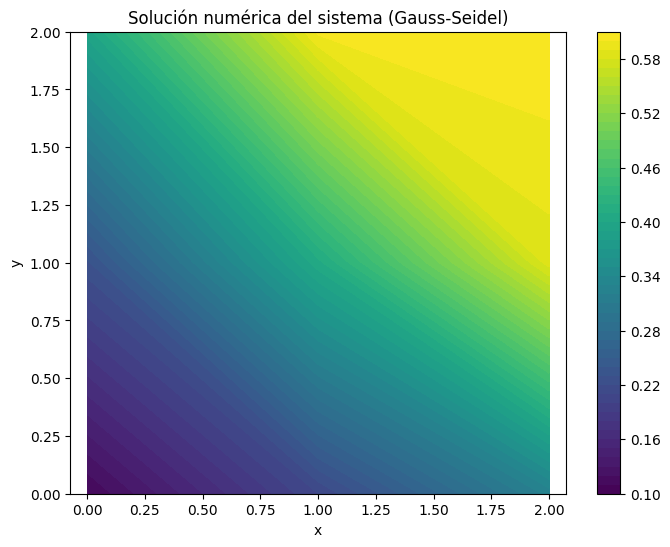

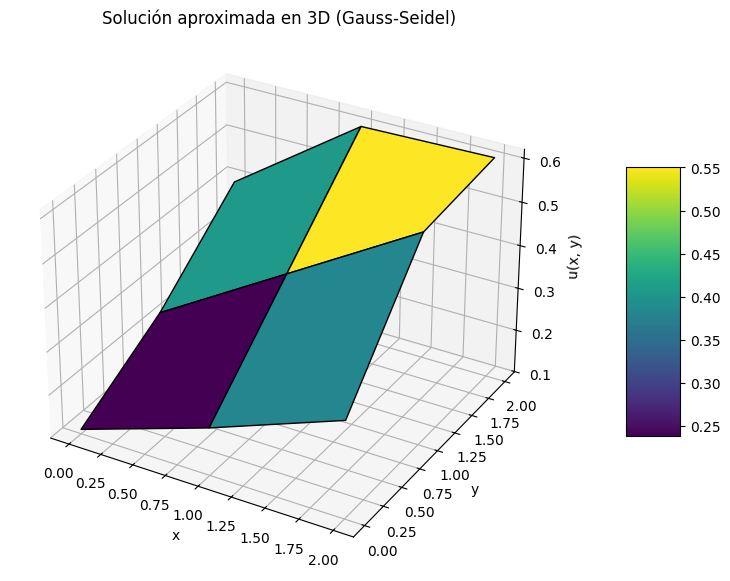

In [17]:
# Reorganizar la solución en una malla 3x3
U = x_aprox.reshape((3,3))

# Definir cuadrícula
M, N = 3, 3
x = np.linspace(0, 2, M)
y = np.linspace(0, 2, N)
X, Y = np.meshgrid(x, y)

# Contorno 2D
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=50, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica del sistema (Gauss-Seidel)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

# Superficie 3D
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución aproximada en 3D (Gauss-Seidel)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()